In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
path = r"C:\Advance_Projects\AI-Powered-Medical-Claim-Processing-System\data\Health Insurance Fraud Claims.xlsx"
# data = pd.read_csv(path)
data = pd.read_excel(path)
data.head()

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,Cluster,ClaimLegitimacy
0,4d76c7f7-d36a-4139-b451-a9a4ad10d7d5,19cf2638-3ec0-4ed9-9995-d9ba4553813a,a3d0cc80-dffe-40ff-a302-23c8ffeedb36,7820.52,2024-07-08,Ta150,iO013,96,F,Orthopedics,Pending,57595.11,Single,Employed,New Alishaview,Inpatient,Paper,3,Legitimate
1,e35193b4-3609-492b-866a-98de19317e9c,5c4bb6c5-4dd3-4a86-85fa-f36c0d8debff,a9f25acf-92b8-45e2-9cef-87bd07d0a591,5453.86,2024-07-08,Fo766,jR349,95,M,Cardiology,Denied,140772.72,Widowed,Employed,East Curtis,Inpatient,Online,2,Legitimate
2,1f3fa373-25ed-4ff4-b6c7-38dcb2fb297f,777866e0-4d10-45a8-a7b4-dbdaa26d5a81,951b1e08-9948-4956-80e5-9277f16bd290,8229.86,2024-07-08,AX876,uU479,10,M,Cardiology,Pending,69803.19,Married,Student,Lake Jennifer,Emergency,Online,3,Legitimate
3,af6a68f4-8319-47b1-a28b-77de01572851,9d7c53ee-eb1a-4f07-9e3a-e86cf82e9f0f,de9e193a-f9a1-4d63-9345-aefe75694628,9519.16,2024-07-08,SQ441,Xs264,59,F,Cardiology,Pending,135530.12,Married,Employed,Martinstad,Routine,Phone,2,Legitimate
4,417fe944-79d2-4610-81c4-a2d496f29ee4,db14b0ca-ac2a-4e83-b085-947ea32e7587,5c7d7045-71b6-4c15-937c-43e4cfe65bf4,3226.15,2024-07-08,FK970,PV476,36,F,Neurology,Approved,36995.52,Divorced,Unemployed,Thomasfurt,Inpatient,Phone,1,Legitimate


In [6]:
pd.isnull(data).sum()

ClaimID                    0
PatientID                  0
ProviderID                 0
ClaimAmount                0
ClaimDate                  0
DiagnosisCode              0
ProcedureCode              0
PatientAge                 0
PatientGender              0
ProviderSpecialty          0
ClaimStatus                0
PatientIncome              0
PatientMaritalStatus       0
PatientEmploymentStatus    0
ProviderLocation           0
ClaimType                  0
ClaimSubmissionMethod      0
Cluster                    0
ClaimLegitimacy            0
dtype: int64

In [7]:
data.shape

(4500, 19)

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ClaimID                  4500 non-null   object        
 1   PatientID                4500 non-null   object        
 2   ProviderID               4500 non-null   object        
 3   ClaimAmount              4500 non-null   float64       
 4   ClaimDate                4500 non-null   datetime64[ns]
 5   DiagnosisCode            4500 non-null   object        
 6   ProcedureCode            4500 non-null   object        
 7   PatientAge               4500 non-null   int64         
 8   PatientGender            4500 non-null   object        
 9   ProviderSpecialty        4500 non-null   object        
 10  ClaimStatus              4500 non-null   object        
 11  PatientIncome            4500 non-null   float64       
 12  PatientMaritalStatus     4500 non-

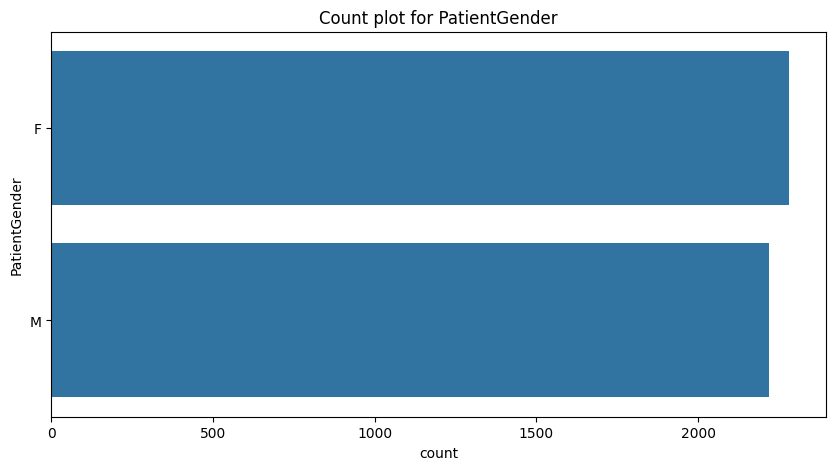

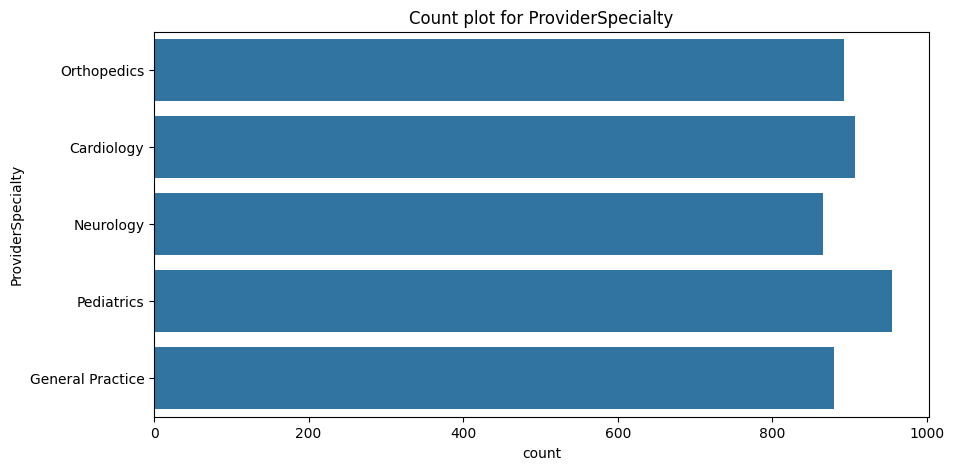

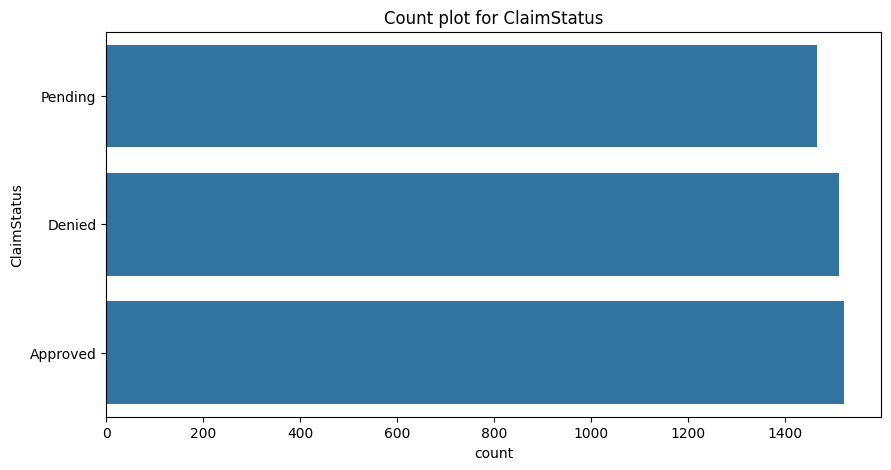

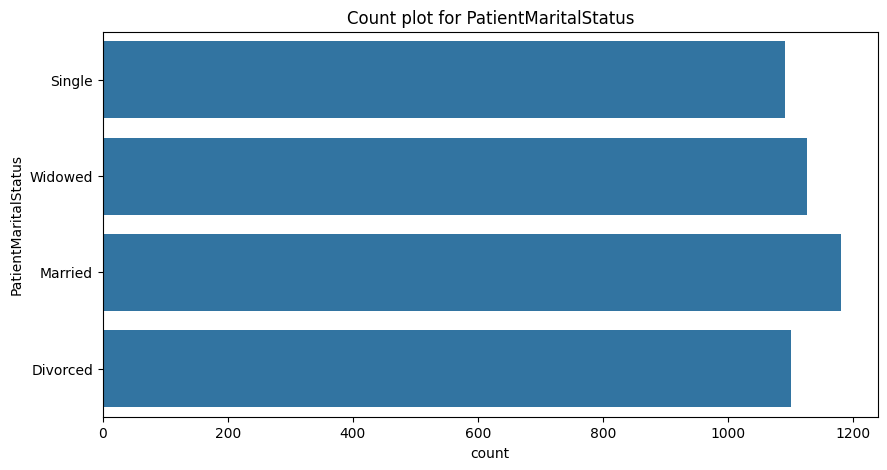

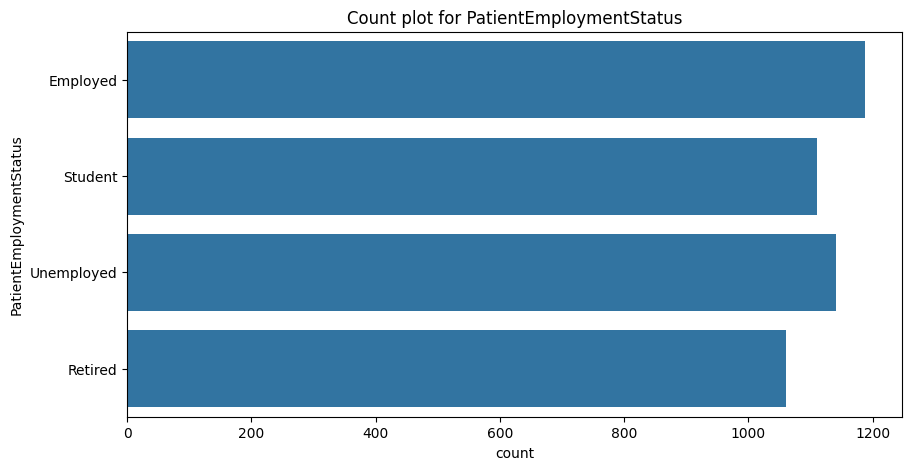

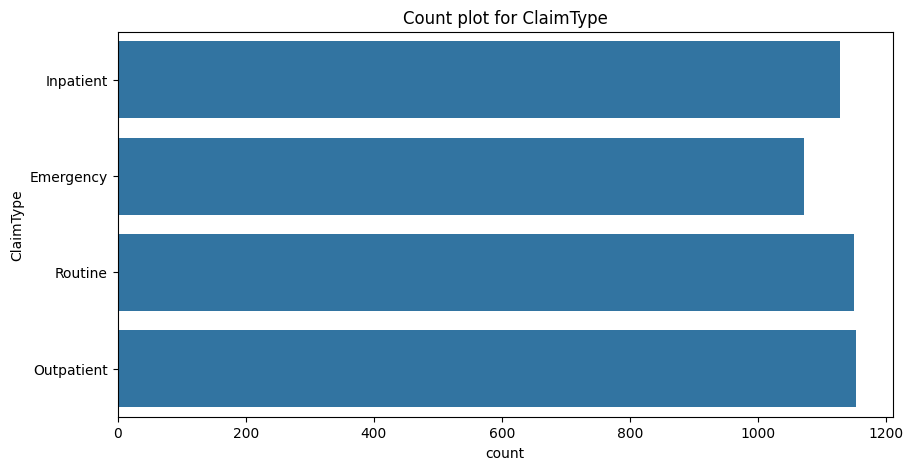

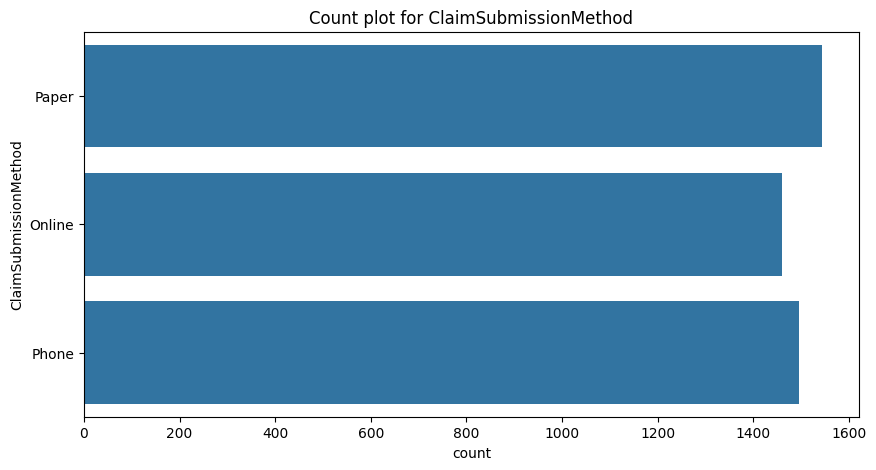

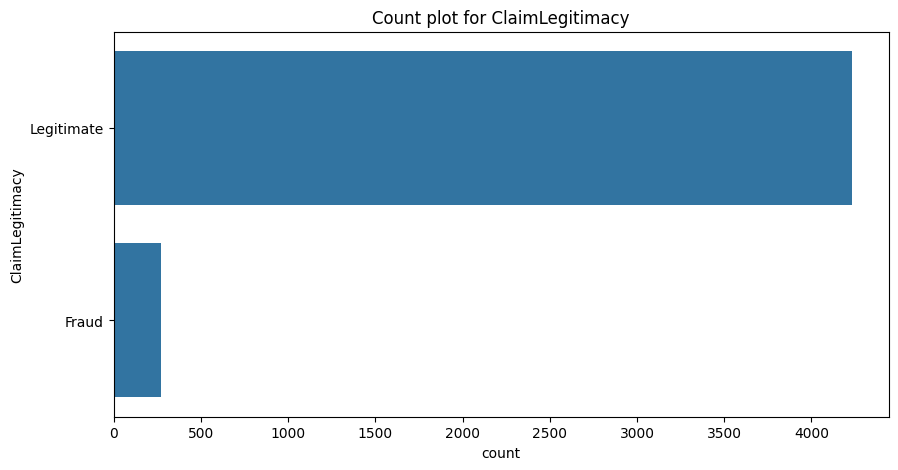

In [9]:
categorical_columns = ['PatientGender', 'ProviderSpecialty', 'ClaimStatus', 'PatientMaritalStatus', 'PatientEmploymentStatus', 'ClaimType', 'ClaimSubmissionMethod', 'ClaimLegitimacy']
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data[column])
    plt.title(f'Count plot for {column}')
    plt.show()


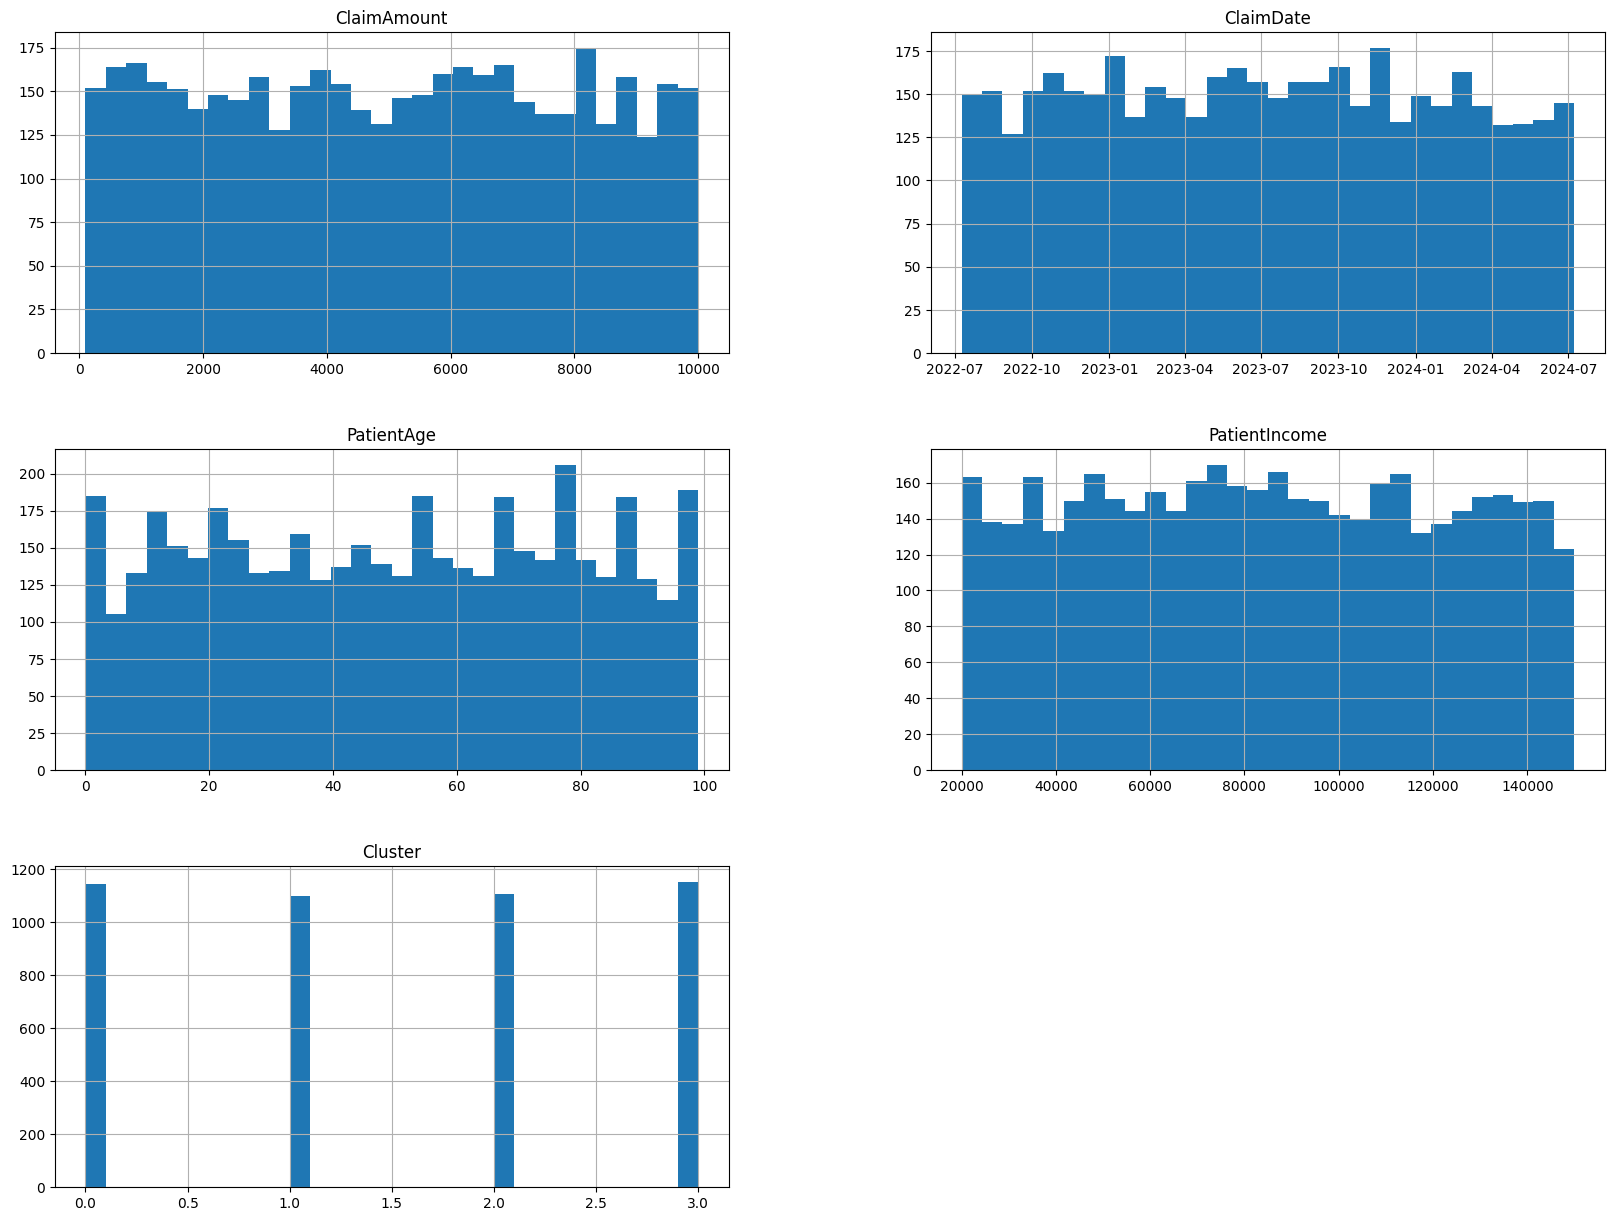

In [10]:
data.hist(bins=30, figsize=(20, 15))
plt.show()

In [24]:
data.drop(columns=['ClaimID', 'PatientID', 'ProviderID', 'ProviderSpecialty', 'ClaimStatus', 'PatientIncome', 'PatientMaritalStatus', 'PatientEmploymentStatus', 'ProviderLocation', 'ClaimType', 'ClaimSubmissionMethod', 'Cluster', 'ClaimDate', 'DiagnosisCode', 'ProcedureCode', 'PatientAge', 'PatientGender'], axis=1, inplace=True)

In [25]:
encode = LabelEncoder()
data['ClaimLegitimacy'] = encode.fit_transform(data['ClaimLegitimacy'])

In [26]:
data.head(4)

,ClaimAmount,ClaimLegitimacy
0,7820.52,1
1,5453.86,1
2,8229.86,1
3,9519.16,1


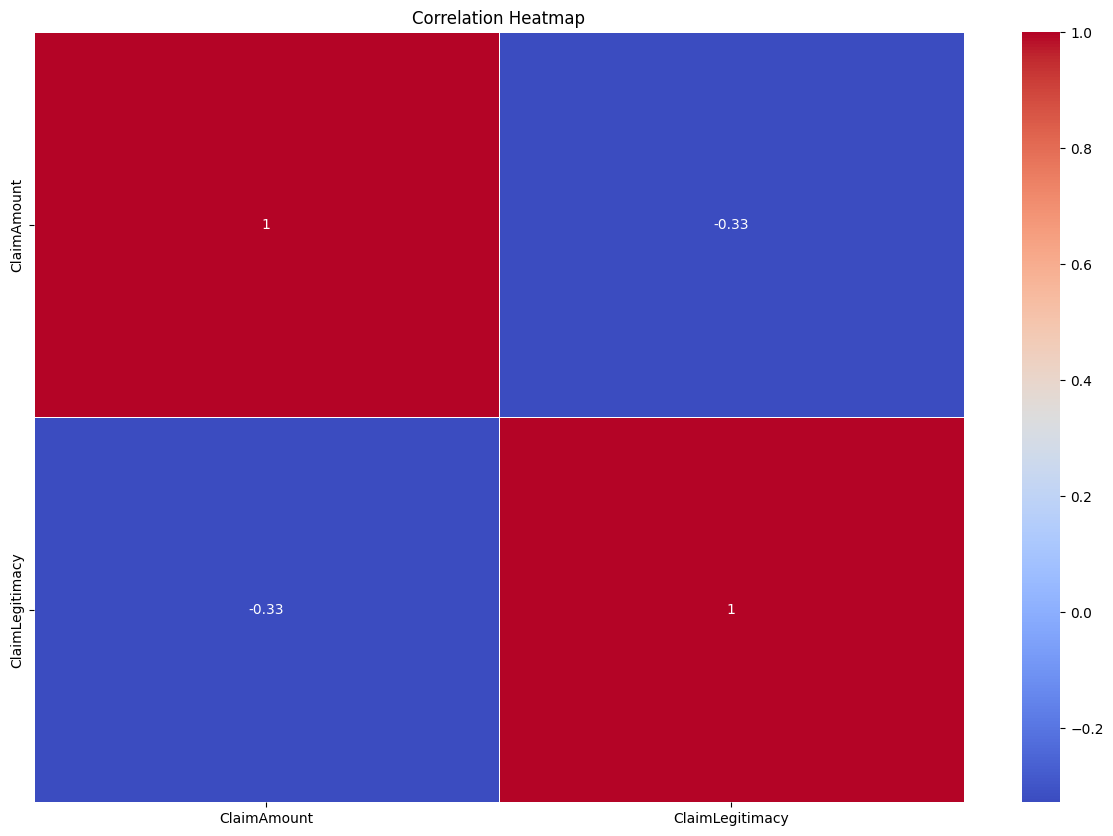

In [27]:
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
x = data.drop(columns=['ClaimLegitimacy'], axis=1)
y = data['ClaimLegitimacy']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
model.score(x_test, y_test)

0.9077777777777778

In [35]:
y_pred = model.predict(x_test)
f1_score(y_test, y_pred)

0.9506246281975015

<Axes: >

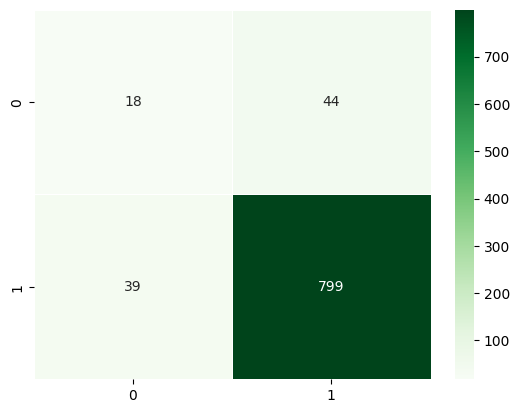

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Greens', linewidths=0.5, fmt='d')

In [32]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [45]:
res = model.predict([[17500]])
print(res[0])

1


c:\a\envs\intern\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
model = joblib.load(r"C:\Advance_Projects\AI-Powered-Medical-Claim-Processing-System\models\model.pkl")